In [29]:
# Install the required libraries
!pip install prophet

In [30]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
bitcoin_df = pd.read_csv("/content/drive/MyDrive/Money Miners Project 1/Resources/Bitcoin_Data.csv",
                 index_col="Date",
                 parse_dates=True
                )

# Drop any values that are blank
bitcoin_df = bitcoin_df.dropna()

# Drop Column '% Change'
bitcoin_df = bitcoin_df.drop(columns="Change %")

# Preview the dataset
bitcoin_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-09,"97,359.4","101,129.7","101,198.6","94,395.8",321.01K
2024-12-08,"101,115.8","99,837.0","101,339.9","98,713.9",128.93K
2024-12-07,"99,837.0","99,757.2","100,441.8","98,969.0",118.44K
2024-12-06,"99,760.7","96,968.9","101,908.5","96,452.0",213.49K
2024-12-05,"96,970.8","98,624.8","103,719.4","92,510.4",245.79K


In [33]:
# Clean the columns of the data
bitcoin_df.columns = ["Price", "Open", "High", "Low", "Volume"]
bitcoin_df.head()

,Price,Open,High,Low,Volume
Date,,,,,
2024-12-09,"97,359.4","101,129.7","101,198.6","94,395.8",321.01K
2024-12-08,"101,115.8","99,837.0","101,339.9","98,713.9",128.93K
2024-12-07,"99,837.0","99,757.2","100,441.8","98,969.0",118.44K
2024-12-06,"99,760.7","96,968.9","101,908.5","96,452.0",213.49K
2024-12-05,"96,970.8","98,624.8","103,719.4","92,510.4",245.79K


In [34]:
# Convert the Price column to numeric and ignore the comma
bitcoin_df['Price'] = bitcoin_df['Price'].str.replace(',', '').astype(float)
bitcoin_df['Open'] = bitcoin_df['Open'].str.replace(',', '').astype(float)
bitcoin_df['High'] = bitcoin_df['High'].str.replace(',', '').astype(float)
bitcoin_df['Low'] = bitcoin_df['Low'].str.replace(',', '').astype(float)

In [35]:

# Create a function to convert K, M and B
def convert_k_to_number(value):
  if isinstance(value, str) and 'K' in value:
    return float(value.replace('K', '')) * 1000
    return float(value)

  if isinstance(value, str) and 'M' in value:
    return float(value.replace('M', '')) * 1000000
    return float(value)

  if isinstance(value, str) and 'B' in value:
    return float(value.replace('B', '')) * 1000000000
    return float(value)

# Apply the function to the Volume Column
bitcoin_df['Volume'] = bitcoin_df['Volume'].apply(convert_k_to_number)

In [36]:
# Sort the dataframe by Volume values
bitcoin_df = bitcoin_df.sort_values(by='Volume', ascending=True)
bitcoin_df.head(8)


,Price,Open,High,Low,Volume
Date,,,,,
2021-08-03,38130.3,39167.4,39766.6,37688.2,260.0
2020-12-25,24689.6,23728.7,24778.9,23445.3,2400.0
2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0
2021-03-04,48428.0,50388.0,51757.7,47521.8,9560.0
2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0
2023-08-26,26017.1,26057.2,26114.1,25993.5,12090.0
2023-09-23,26579.2,26581.7,26636.2,26517.5,12920.0
2023-09-09,25901.1,25909.5,25938.5,25814.3,13480.0


In [37]:
# Reset the index so that we recode the columns for Prophet
bitcoin_df.reset_index(inplace=True)

In [38]:
# Create a DataFrame for Bitcoin to include the Date and Price columns only
prophet_bitcoin_df = bitcoin_df[["Date", "Price"]]

# Rename the columns to the Prophet model syntax
prophet_bitcoin_df.columns = ["ds", "y"]

# Preview the dataset
prophet_bitcoin_df.head()


,ds,y
0,2021-08-03,38130.3
1,2020-12-25,24689.6
2,2021-08-16,45996.3
3,2021-03-04,48428.0
4,2023-08-12,29428.2


In [39]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [40]:
# Fit the time-series model.
m.fit(prophet_bitcoin_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m_462zo/tqegyxyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m_462zo/20ormd7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35507', 'data', 'file=/tmp/tmp9m_462zo/tqegyxyt.json', 'init=/tmp/tmp9m_462zo/20ormd7h.json', 'output', 'file=/tmp/tmp9m_462zo/prophet_modelj2yczoi6/prophet_model-20241213004547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:45:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as approx 385 days
future_bitcoin_trends = m.make_future_dataframe(periods=385, freq='D')

# View the last five rows of the future_bitcoin_trends DataFrame
display(future_bitcoin_trends.tail(5))

,ds
2550,2025-12-25
2551,2025-12-26
2552,2025-12-27
2553,2025-12-28
2554,2025-12-29


In [42]:
# Make the predictions for the trend data using the future_bitcoin_trends DataFrame
forecast_bitcoin_trends = m.predict(future_bitcoin_trends)

# Display the first five rows of the forecast_bitcoin_trends DataFrame
display(forecast_bitcoin_trends.head(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,-3114.396975,-9233.899172,3275.035028,-3114.396975,-3114.396975,344.515987,344.515987,344.515987,-42.321854,-42.321854,-42.321854,386.837841,386.837841,386.837841,0.0,0.0,0.0,-2769.880988
1,2019-01-02,-3041.661196,-8829.263752,3577.110663,-3041.661196,-3041.661196,666.741998,666.741998,666.741998,63.905837,63.905837,63.905837,602.836161,602.836161,602.836161,0.0,0.0,0.0,-2374.919197
2,2019-01-03,-2968.925417,-8191.759035,4070.807253,-2968.925417,-2968.925417,764.370343,764.370343,764.370343,-36.706218,-36.706218,-36.706218,801.076561,801.076561,801.076561,0.0,0.0,0.0,-2204.555074
3,2019-01-04,-2896.189638,-7978.603605,4135.713749,-2896.189638,-2896.189638,969.074605,969.074605,969.074605,-8.705240,-8.705240,-8.705240,977.779845,977.779845,977.779845,0.0,0.0,0.0,-1927.115033
4,2019-01-05,-2823.453859,-7720.896102,4680.029017,-2823.453859,-2823.453859,1100.220622,1100.220622,1100.220622,-29.511097,-29.511097,-29.511097,1129.731719,1129.731719,1129.731719,0.0,0.0,0.0,-1723.233237


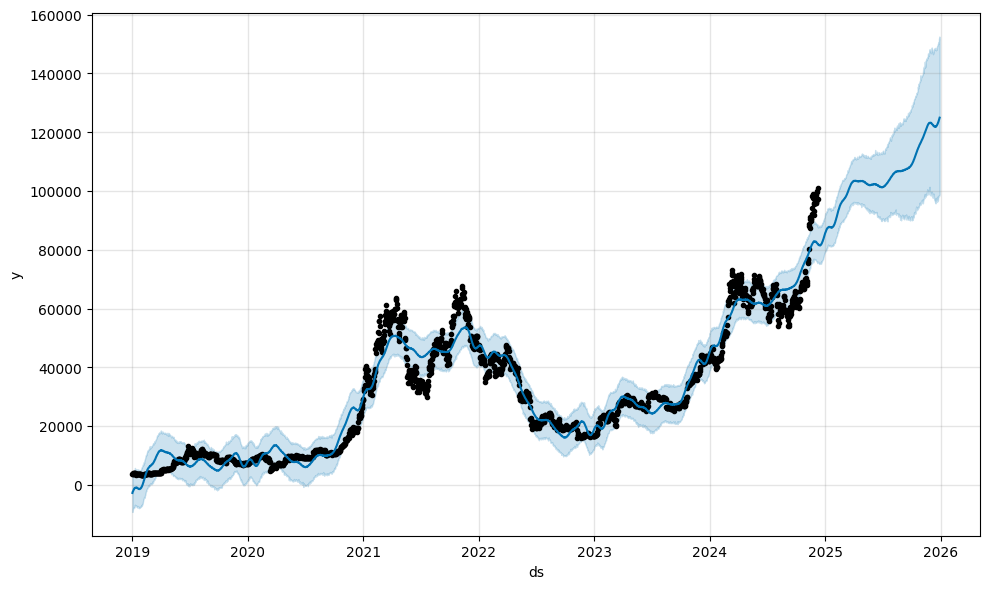

In [43]:
# From the forecast_bitcoin_trends DataFrame, plot the data to visualize
m.plot(forecast_bitcoin_trends);


In [44]:
# Save the forecast dataframe to a csv
forecast_bitcoin_trends.to_csv("forecast_bitcoin_trends.csv")

In [45]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
bitcoin_df['Stock Volatility'] = bitcoin_df['Price'].rolling(window=4).std()
bitcoin_df.head()

,Date,Price,Open,High,Low,Volume,Stock Volatility
0,2021-08-03,38130.3,39167.4,39766.6,37688.2,260.0,NaN
1,2020-12-25,24689.6,23728.7,24778.9,23445.3,2400.0,NaN
2,2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0,NaN
3,2021-03-04,48428.0,50388.0,51757.7,47521.8,9560.0,10692.556843
4,2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0,11836.908845


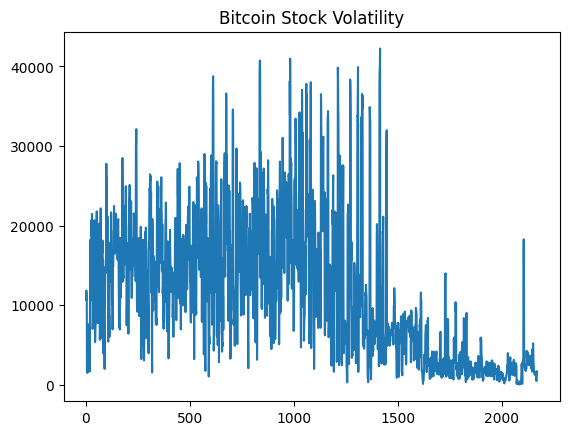

In [46]:
# Visualize the stock volatility
bitcoin_df['Stock Volatility'].plot(title="Bitcoin Stock Volatility");

In [47]:
# Export new dataframe for bitcoin_analysis_dataframe
bitcoin_df.to_csv("bitcoin_analysis_dataframe.csv")
bitcoin_df.head()

,Date,Price,Open,High,Low,Volume,Stock Volatility
0,2021-08-03,38130.3,39167.4,39766.6,37688.2,260.0,NaN
1,2020-12-25,24689.6,23728.7,24778.9,23445.3,2400.0,NaN
2,2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0,NaN
3,2021-03-04,48428.0,50388.0,51757.7,47521.8,9560.0,10692.556843
4,2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0,11836.908845
